## Feature Selection

In [1]:
# pip install yellowbrick
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from yellowbrick.model_selection import rfecv
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_theme(style='darkgrid',palette='viridis')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

- `Yellowbrick` is a Python library for visualizing machine learning processes.
- `RFECV` stands for Recursive Feature Elimination with Cross-Validation.
- This import allows you to use the RFECV class from Yellowbrick to perform feature selection by recursively eliminating less important features while using cross-validation to find the best set of features for a machine learning model.

- `sklearn` is a Python library for machine learning tools, and it provides various methods for feature selection and modeling.
- `SelectKBest` is a class used for feature selection in `sklearn`. It selects the top k features based on their scores in univariate statistical tests.
- `chi2` is a statistical test imported from `sklearn.feature_selection`. It's often used with `SelectKBest` for feature selection to compute scores using the chi-squared (χ²) statistical test for categorical target variables.
- `RFE` stands for Recursive Feature Elimination. It's used for feature selection by recursively removing less important features based on model coefficients or feature importance rankarning.

In [2]:
#Load Data
df = pd.read_csv('https://raw.githubusercontent.com/aishwaryamate/Datasets/main/Pima.csv', index_col=0)
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Define x and y
x = df.iloc[:,:-1]
y = df['class']

In [4]:
x

,preg,plas,pres,skin,test,mass,pedi,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


## Univariate Selection
- We use Chi2 test to perform the feature selection.
- When two features are independent, the observed count is close to the expected count, thus we will have smaller Chi-Square value. So high Chi-Square value indicates that the hypothesis of independence is incorrect.
- In simple words, higher the Chi-Square value the feature is more dependent on the response and it can be selected for model training.

In [5]:
#Chi square for feature selection

In [6]:
# K in SelectKBest stands for number of feature
test = SelectKBest(score_func=chi2, k = 5)

test.fit(x,y)

SelectKBest(k=5, score_func=<function chi2 at 0x00000222DE80E3E0>)

In [7]:
test.scores_

array([ 111.51969064, 1411.88704064,   17.60537322,   53.10803984,
       2175.56527292,  127.66934333,    5.39268155,  181.30368904])

In [8]:
np.max(test.scores_), np.min(test.scores_)

(2175.5652729220137, 5.39268154697144)

In [9]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [10]:
univariate = pd.DataFrame(test.scores_).T
univariate

univariate.columns = x.columns
univariate

,preg,plas,pres,skin,test,mass,pedi,age
0,111.519691,1411.887041,17.605373,53.10804,2175.565273,127.669343,5.392682,181.303689


In [11]:
univariate.max().max() # test is most important feature according to chi2 

2175.5652729220137

## Recursive Feature Elimination


In [12]:
#RFE with logistic regression

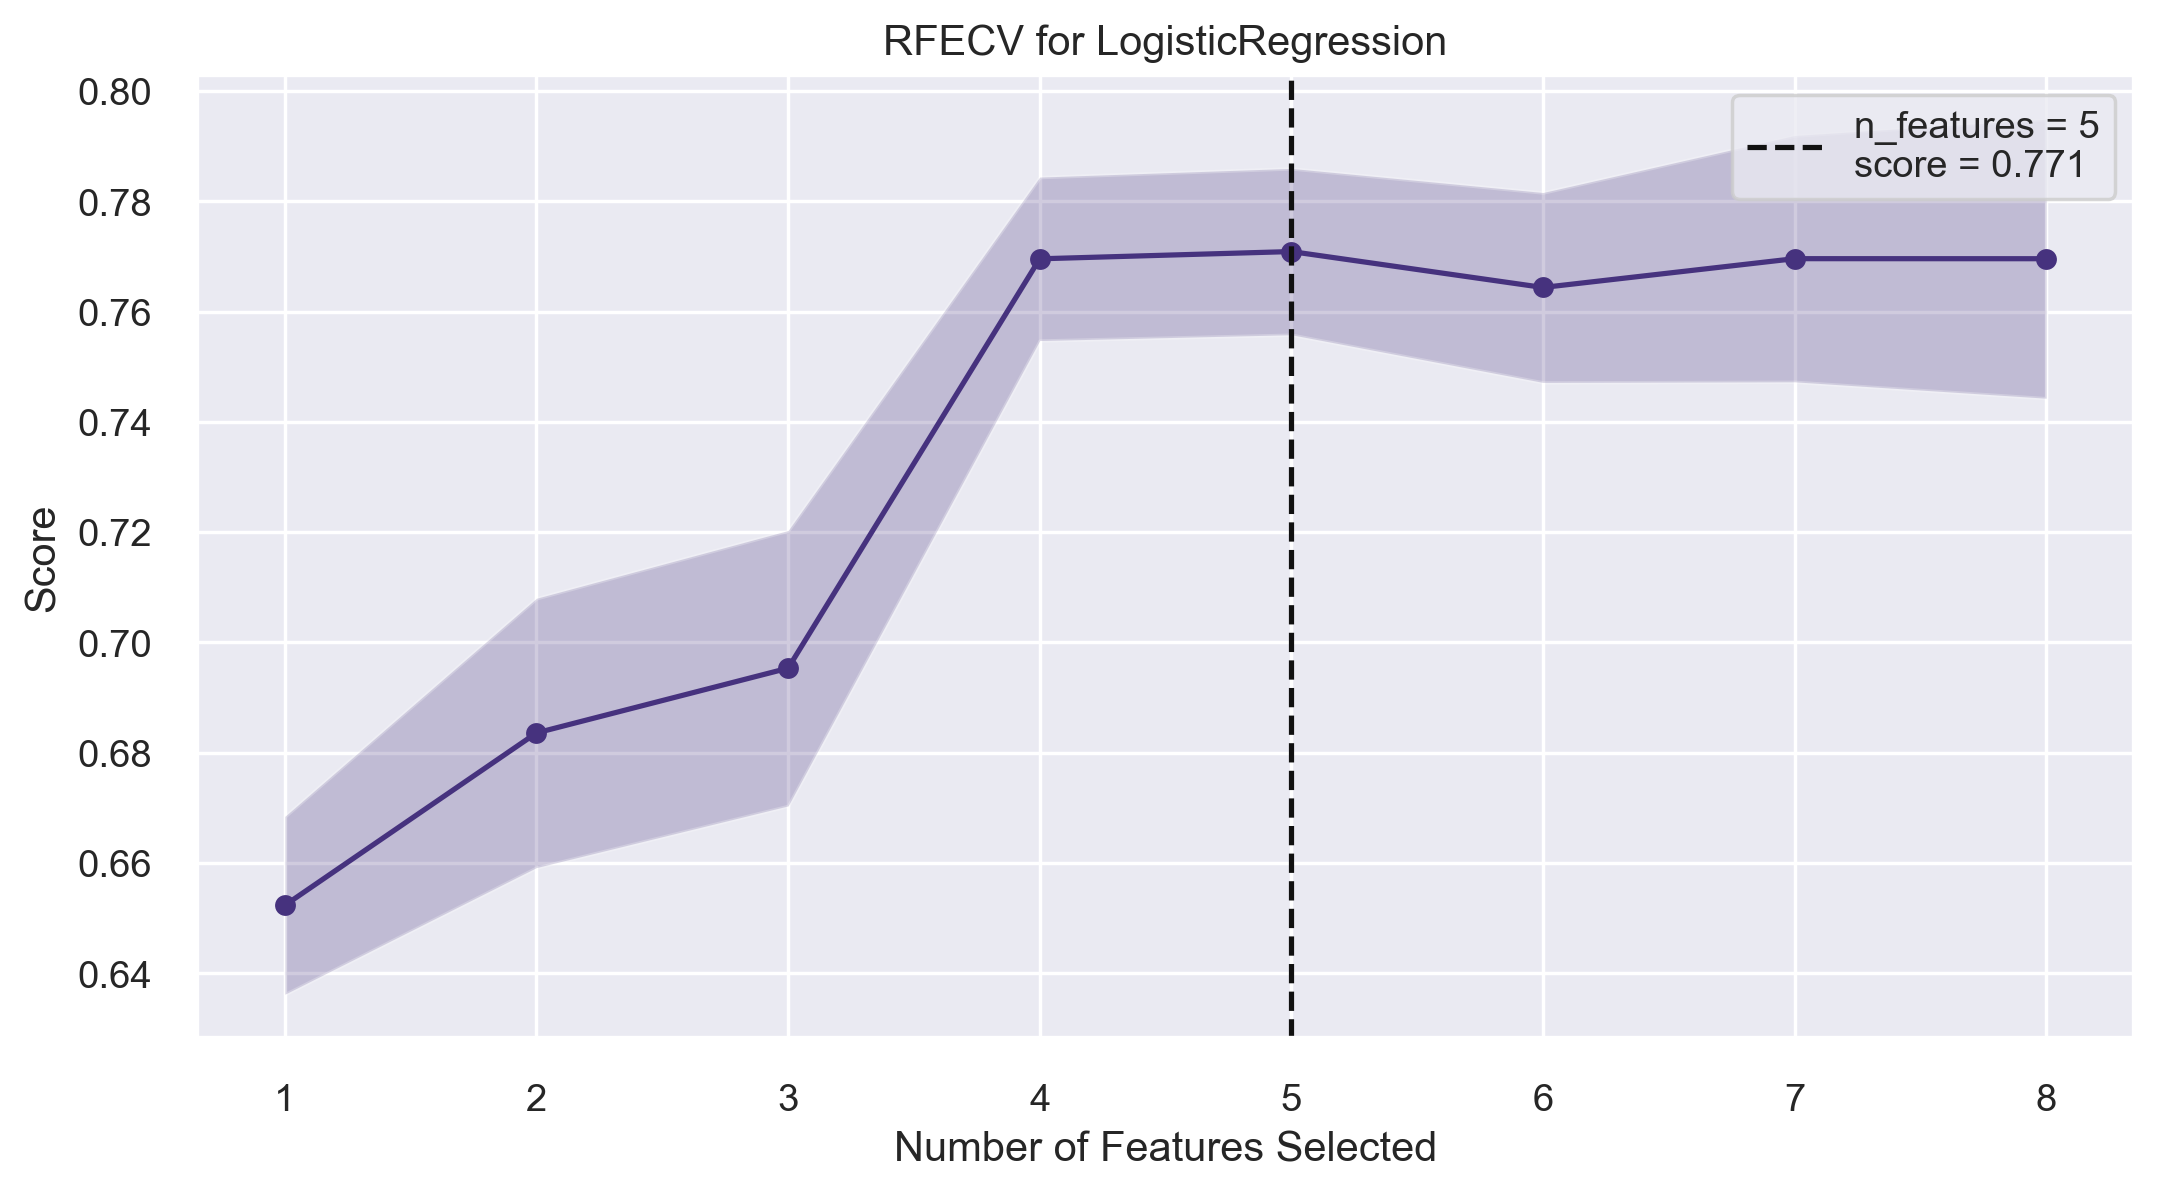

In [13]:
rfe =  rfecv(LogisticRegression(), x,y)

In [14]:
rfe.ranking_

array([1, 1, 2, 3, 4, 1, 1, 1])

- Five features have the highest rank (1), indicating that they are considered the most important according to the RFE process.
- Features 3 has a rank of 2.
- Feature 4 has a rank of 3.
- Feature 5 has a rank of 4.

In [15]:
x.columns

Index(['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age'], dtype='object')

In [16]:
rfe_sel = pd.DataFrame({
    'Ranking' : rfe.ranking_,
    'Features' : x.columns
})

In [17]:
rfe_sel

,Ranking,Features
0,1,preg
1,1,plas
2,2,pres
3,3,skin
4,4,test
5,1,mass
6,1,pedi
7,1,age


In [18]:
# preg, plas, mass, pedi and age are the most important according to the RFE process.
# and least important is 'test'

In [19]:
rfe_sel[rfe_sel['Ranking'] == 1]

,Ranking,Features
0,1,preg
1,1,plas
5,1,mass
6,1,pedi
7,1,age


In [20]:
# The final conclusion is based on the third feature selection process because each process provides different outputs.

## Tree Based method

In [21]:
dt = DecisionTreeClassifier()

In [22]:
dt.fit(x,y)

DecisionTreeClassifier()

In [23]:
dt.feature_importances_

array([0.05900141, 0.34324374, 0.0809682 , 0.01894527, 0.03329361,
       0.21187177, 0.13488276, 0.11779322])

In [24]:
ig_sel = pd.DataFrame({
    'Feature' : x.columns,
    'IG': dt.feature_importances_
})

In [25]:
ig_sel

,Feature,IG
0,preg,0.059001
1,plas,0.343244
2,pres,0.080968
3,skin,0.018945
4,test,0.033294
5,mass,0.211872
6,pedi,0.134883
7,age,0.117793


In [26]:
ig_sel['IG'].idxmax(), ig_sel['IG'].max()

(1, 0.34324374416104836)

In [27]:
# Accordind to Tree Based mathod 

In [28]:
ig_sel.sort_values(by = 'IG', ascending=False)

,Feature,IG
1,plas,0.343244
5,mass,0.211872
6,pedi,0.134883
7,age,0.117793
2,pres,0.080968
0,preg,0.059001
4,test,0.033294
3,skin,0.018945


In [29]:
# Out of 3 methods 2 methods says 'test' column is not imp

In [30]:
# Atleast use 5 feature selection method the choose the common impoertant features